# Tema: Quantidade de mulheres candidatas a vereadora do município de Caçapava entre o ano 2016 e 2020.
# Curso: Análise e Desenvolvimento de Sistemas 
# Alunas: Érica dos Santos e Stephanie Costa.
# Professor: Fernando Masanori

## Importando as bibliotecas

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Realizando a leitura dos dados de 2016 e 2020

In [9]:
candidata_vereadora_2016 = pd.read_csv(r"C:\Users\Erica\Documents\Faculdade\5Semestre\Banco-de-dados\material-analise-de-dados\consulta_cand_2016\consulta_cand_2016_sp.csv", sep=';' , encoding='iso-8859-1',usecols = ['NM_UE', 'DS_GENERO', 'NM_CANDIDATO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA','DS_GRAU_INSTRUCAO','DS_OCUPACAO','VR_DESPESA_MAX_CAMPANHA','ST_REELEICAO','DS_SITUACAO_CANDIDATURA'])

In [10]:
candidata_vereadora_2020 = pd.read_csv(r"C:\Users\Erica\Documents\Faculdade\5Semestre\Banco-de-dados\material-analise-de-dados\consulta_cand_2020\consulta_cand_2020_sp.csv", sep=';' , encoding='iso-8859-1', usecols = ['NM_UE', 'DS_GENERO', 'NM_CANDIDATO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA','DS_GRAU_INSTRUCAO','DS_OCUPACAO','VR_DESPESA_MAX_CAMPANHA','ST_REELEICAO','DS_SITUACAO_CANDIDATURA'])

## Visualização da estrutura do DataFrame de 2016 e 2020

In [139]:
candidata_vereadora_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86779 entries, 0 to 86778
Data columns (total 10 columns):
NM_UE                      86779 non-null object
NM_CANDIDATO               86779 non-null object
DS_SITUACAO_CANDIDATURA    86779 non-null object
DS_GENERO                  86779 non-null object
DS_GRAU_INSTRUCAO          86779 non-null object
DS_ESTADO_CIVIL            86779 non-null object
DS_COR_RACA                86779 non-null object
DS_OCUPACAO                86779 non-null object
VR_DESPESA_MAX_CAMPANHA    86779 non-null int64
ST_REELEICAO               86779 non-null object
dtypes: int64(1), object(9)
memory usage: 6.6+ MB


In [12]:
candidata_vereadora_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93330 entries, 0 to 93329
Data columns (total 10 columns):
NM_UE                      93330 non-null object
NM_CANDIDATO               93330 non-null object
DS_SITUACAO_CANDIDATURA    93330 non-null object
DS_GENERO                  93330 non-null object
DS_GRAU_INSTRUCAO          93330 non-null object
DS_ESTADO_CIVIL            93330 non-null object
DS_COR_RACA                93330 non-null object
DS_OCUPACAO                93330 non-null object
VR_DESPESA_MAX_CAMPANHA    93330 non-null int64
ST_REELEICAO               93330 non-null object
dtypes: int64(1), object(9)
memory usage: 7.1+ MB


## Porcentagem dos candidatos do sexo feminino e masculino

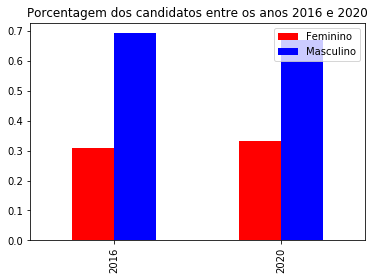

In [143]:
cpv_sexo_2016 = candidata_vereadora_2016.query('NM_UE == "CAÇAPAVA"')
cpv_sexo_2020 = candidata_vereadora_2020.query('NM_UE == "CAÇAPAVA"')

qtd_2016 = cpv_sexo_2016['DS_GENERO'].value_counts(normalize=True)
qtd_2020 = cpv_sexo_2020['DS_GENERO'].value_counts(normalize=True)

tab_porcentagem = pd.DataFrame([qtd_2016, qtd_2020], index=['2016','2020']).T

pd.concat(
    [tab_porcentagem.min().rename('Feminino'), 
     tab_porcentagem.max().rename('Masculino')],
    axis=1).plot.bar(color=['red', 'blue'], title='Porcentagem dos candidatos entre os anos 2016 e 2020')

## Filtrando as colunas com os dados dos candidatos do sexo feminino, cidade de Caçapava e candidatura apta dos anos de 2016 e 2020

In [17]:
cpv_2016 = candidata_vereadora_2016.query('DS_GENERO == "FEMININO" & NM_UE == "CAÇAPAVA" & DS_SITUACAO_CANDIDATURA == "APTO"')
cpv_2016

,NM_UE,NM_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
2020,CAÇAPAVA,APARECIDA DE OLIVEIRA JULIO MONTEIRO,APTO,FEMININO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PRETA,"FEIRANTE, AMBULANTE E MASCATE",-1,N
3295,CAÇAPAVA,CREUSA EUNICE FRANÇA,APTO,FEMININO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),BRANCA,COMERCIANTE,0,N
3355,CAÇAPAVA,MARCIA DOS SANTOS ULLIANI,APTO,FEMININO,SUPERIOR COMPLETO,CASADO(A),PRETA,ASSISTENTE SOCIAL,0,N
4567,CAÇAPAVA,DALILA MAGALI RODRIGUES PENTEADO,APTO,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,-1,N
5971,CAÇAPAVA,MARIA ANGÉLICA GIOVANELLI,APTO,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,-1,N
...,...,...,...,...,...,...,...,...,...,...
83199,CAÇAPAVA,ROBERTA MARIA DOS SANTOS SA CAMPOS,APTO,FEMININO,SUPERIOR INCOMPLETO,SOLTEIRO(A),BRANCA,AGENTE DE VIAGEM,-1,N
84286,CAÇAPAVA,ARIANE FERREIRA DA SILVA SANTOS,APTO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,OUTROS,-1,N
84935,CAÇAPAVA,AUGUSTA DO ROSÁRIO FAUST,APTO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,ASTRÔNOMO,-1,N
85271,CAÇAPAVA,ROSA DE ASSIS SALLES,APTO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,DONA DE CASA,-1,N


In [18]:
cpv_2020 = candidata_vereadora_2020.query('DS_GENERO == "FEMININO" & NM_UE == "CAÇAPAVA" & DS_SITUACAO_CANDIDATURA == "APTO"')
cpv_2020

,NM_UE,NM_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
1802,CAÇAPAVA,HORACELIA DE FATIMA TRINDADE OLIVEIRA,APTO,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,DONA DE CASA,31777,N
2319,CAÇAPAVA,RAQUEL STELA FONSECA,APTO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,OUTROS,31777,N
5184,CAÇAPAVA,DANIELE CRISTINE GALDINO SIQUEIRA,APTO,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,RELAÇÕES-PÚBLICAS,31777,N
6049,CAÇAPAVA,MARTHA MARINA THOMAZ DE AQUINO IVO,APTO,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,APOSENTADO (EXCETO SERVIDOR PÚBLICO),31777,N
6268,CAÇAPAVA,RITA DE CASSIA LIMA AFONSO ALENCAR,APTO,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,AGENTE ADMINISTRATIVO,31777,N
12890,CAÇAPAVA,CAMILA APARECIDA ALVES MIGUEL,APTO,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,BANCÁRIO E ECONOMIÁRIO,31777,N
14172,CAÇAPAVA,SHIRLEY REGINA SANTOS DE ABREU,APTO,FEMININO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,31777,N
14203,CAÇAPAVA,MARCIA ALVES CORREIA GOMES,APTO,FEMININO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),BRANCA,"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",31777,N
17536,CAÇAPAVA,ELISABETE NATALI ALVARENGA,APTO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,GERENTE,31777,N
17741,CAÇAPAVA,ADRIANA CRISTINA GABRIEL,APTO,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,OUTROS,31777,N


## Nível de escolariadade das Candidatas da cidade de Caçapava dos anos de 2016 e 2020

ENSINO MÉDIO COMPLETO            30.303030
SUPERIOR COMPLETO                30.303030
ENSINO FUNDAMENTAL COMPLETO      13.636364
ENSINO FUNDAMENTAL INCOMPLETO     9.090909
SUPERIOR INCOMPLETO               9.090909
ENSINO MÉDIO INCOMPLETO           6.060606
LÊ E ESCREVE                      1.515152
Name: DS_GRAU_INSTRUCAO, dtype: float64

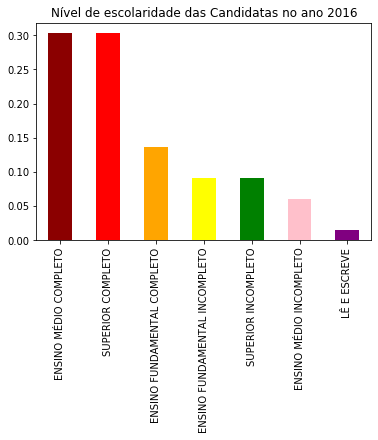

In [144]:
cpv_2016['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).plot(kind='bar',title='Nível de escolaridade das Candidatas no ano 2016', color=['darkred', 'red', 'orange', 'yellow', 'green', 'pink', 'purple']);
cpv_2016['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

ENSINO MÉDIO COMPLETO            51.851852
SUPERIOR COMPLETO                37.037037
ENSINO FUNDAMENTAL COMPLETO       3.703704
SUPERIOR INCOMPLETO               3.703704
ENSINO FUNDAMENTAL INCOMPLETO     3.703704
Name: DS_GRAU_INSTRUCAO, dtype: float64

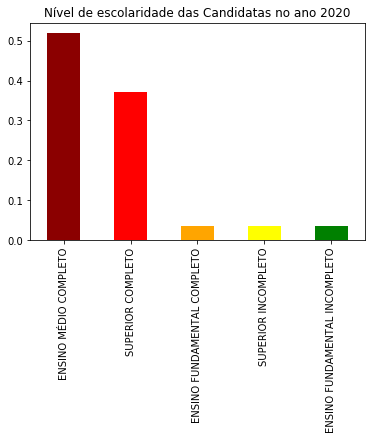

In [146]:
cpv_2020['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).plot(kind='bar',title='Nível de escolaridade das Candidatas no ano 2020', color=['darkred', 'red', 'orange', 'yellow', 'green']);
cpv_2020['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

## Estado Civil das Candidatas da cidade de Caçapava dos anos de 2016 e 2020

In [46]:
cpv_2016['DS_ESTADO_CIVIL'].value_counts(normalize=True)*100

CASADO(A)                    53.030303
SOLTEIRO(A)                  25.757576
DIVORCIADO(A)                18.181818
SEPARADO(A) JUDICIALMENTE     3.030303
Name: DS_ESTADO_CIVIL, dtype: float64

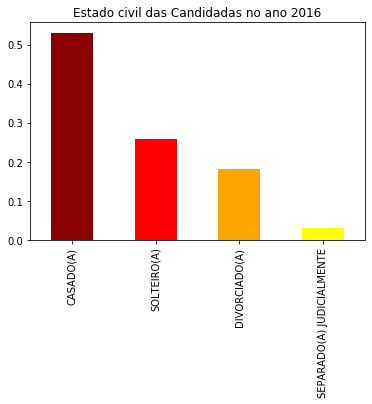

In [147]:
cpv_2016['DS_ESTADO_CIVIL'].value_counts(normalize=True).plot(kind='bar',title='Estado civil das Candidadas no ano 2016', color=['darkred', 'red', 'orange', 'yellow']);

In [47]:
cpv_2020['DS_ESTADO_CIVIL'].value_counts(normalize=True)*100

CASADO(A)        46.296296
SOLTEIRO(A)      40.740741
DIVORCIADO(A)    12.962963
Name: DS_ESTADO_CIVIL, dtype: float64

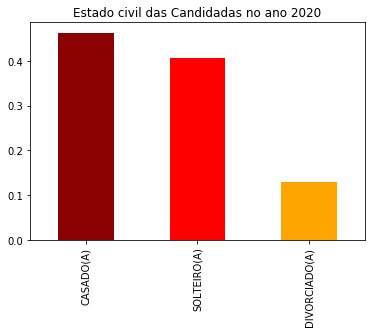

In [148]:
cpv_2020['DS_ESTADO_CIVIL'].value_counts(normalize=True).plot(kind='bar',title='Estado civil das Candidadas no ano 2020', color=['darkred', 'red', 'orange']);

## Cor/raça das Candidatas da cidade de Caçapava dos anos de 2016 e 2020

BRANCA    38
PARDA     23
PRETA      5
Name: DS_COR_RACA, dtype: int64


Text(0, 0.5, '')

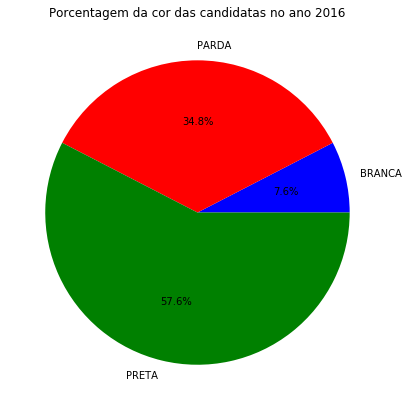

In [149]:
qtd = cpv_2016['DS_COR_RACA'].value_counts()
print(qtd)

plt = cpv_2016.groupby('DS_COR_RACA').size().sort_values().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red', 'green'], labels=['BRANCA', 'PARDA', 'PRETA'], figsize=(10,7))
plt.set_title('Porcentagem da cor das candidatas no ano 2016')
plt.set_ylabel('')

BRANCA    44
PARDA      7
PRETA      3
Name: DS_COR_RACA, dtype: int64


Text(0, 0.5, '')

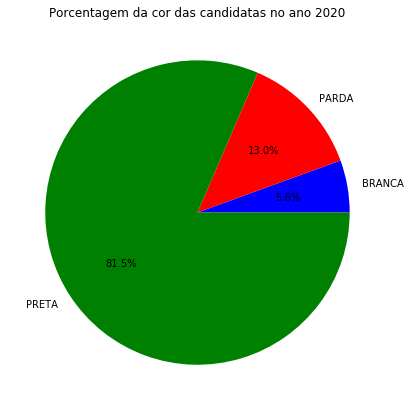

In [150]:
qtd = cpv_2020['DS_COR_RACA'].value_counts()
print(qtd)

plt = cpv_2020.groupby('DS_COR_RACA').size().sort_values().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red', 'green'], labels=['BRANCA', 'PARDA', 'PRETA'], figsize=(10,7))
plt.set_title('Porcentagem da cor das candidatas no ano 2020')
plt.set_ylabel('')

## Ocupação das Candidatas da cidade de Caçapava dos anos de 2016 e 2020

In [70]:
cpv_2016['DS_OCUPACAO'].value_counts(normalize=True)*100

OUTROS                                            15.151515
DONA DE CASA                                      13.636364
SERVIDOR PÚBLICO MUNICIPAL                         6.060606
ADMINISTRADOR                                      6.060606
AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS              6.060606
CABELEIREIRO E BARBEIRO                            4.545455
ASSISTENTE SOCIAL                                  4.545455
ARTESÃO                                            3.030303
EMPRESÁRIO                                         3.030303
COMERCIANTE                                        3.030303
ADVOGADO                                           3.030303
COZINHEIRO                                         3.030303
PROFESSOR DE ENSINO FUNDAMENTAL                    3.030303
GERENTE                                            1.515152
COBRADOR DE TRANSPORTE COLETIVO                    1.515152
REPRESENTANTE COMERCIAL                            1.515152
FEIRANTE, AMBULANTE E MASCATE           

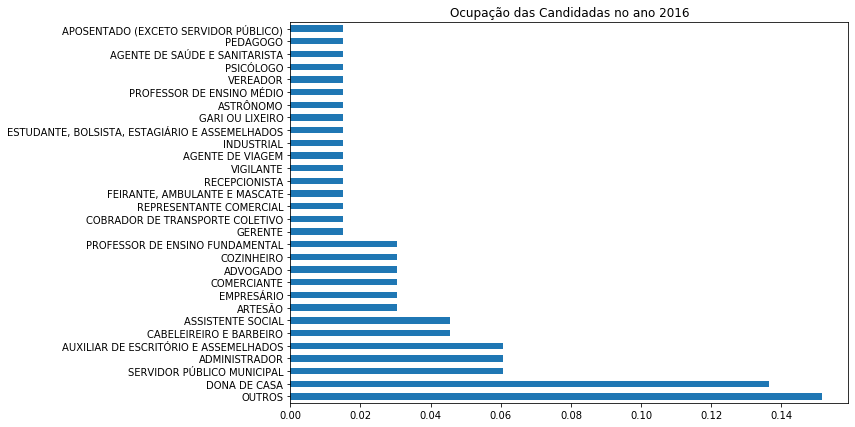

In [151]:
cpv_2016['DS_OCUPACAO'].value_counts(normalize=True).plot(kind='barh',title='Ocupação das Candidadas no ano 2016', figsize=(10,7));

In [68]:
cpv_2020['DS_OCUPACAO'].value_counts(normalize=True)*100

OUTROS                                                         18.518519
COMERCIANTE                                                     9.259259
DONA DE CASA                                                    7.407407
PROFESSOR DE ENSINO FUNDAMENTAL                                 5.555556
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                            5.555556
EMPRESÁRIO                                                      5.555556
GERENTE                                                         5.555556
SERVIDOR PÚBLICO MUNICIPAL                                      3.703704
SERVIDOR PÚBLICO ESTADUAL                                       3.703704
AGENTE ADMINISTRATIVO                                           1.851852
RELAÇÕES-PÚBLICAS                                               1.851852
TELEFONISTA                                                     1.851852
MANICURE E MAQUILADOR                                           1.851852
REPRESENTANTE COMERCIAL                            

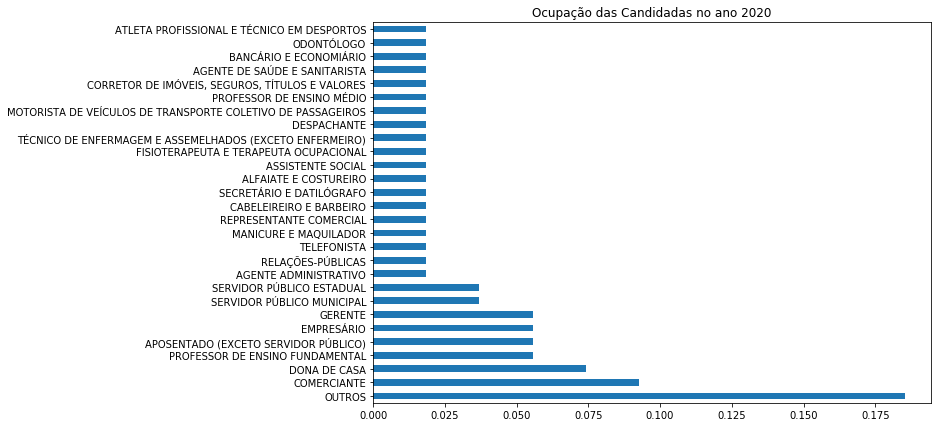

In [152]:
cpv_2020['DS_OCUPACAO'].value_counts(normalize=True).plot(kind='barh',title='Ocupação das Candidadas no ano 2020', figsize=(10,7));

## Porcentagem das candidatas que concorreram ou não à reeleição na cidade de Caçapava nos anos de 2016 e 2020. Pode assumir os valores: S - Sim e N - Não.

In [133]:
reeleicao_2016 = cpv_2016['ST_REELEICAO'].value_counts(normalize=True)*100
reeleicao_2020 = cpv_2020['ST_REELEICAO'].value_counts(normalize=True)*100
print(reeleicao_2016)
print(reeleicao_2020)

N    98.484848
S     1.515152
Name: ST_REELEICAO, dtype: float64
N    100.0
Name: ST_REELEICAO, dtype: float64


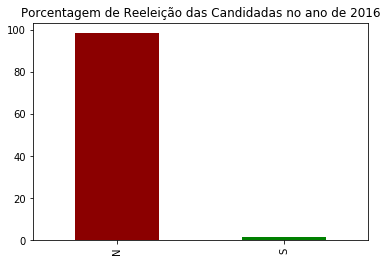

In [153]:
reeleicao_2016.plot(kind='bar',width=0.5, color=['darkred','green'], title='Porcentagem de Reeleição das Candidadas no ano de 2016', grid=False)

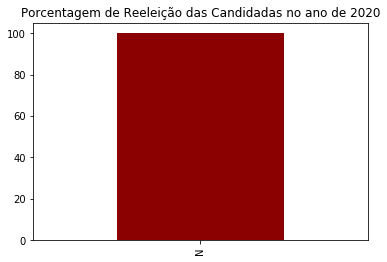

In [154]:
reeleicao_2020.plot(kind='bar',width=0.5, color=['darkred','green'], title='Porcentagem de Reeleição das Candidadas no ano de 2020', grid=False)